<a href="https://colab.research.google.com/github/iammhk/Quant-101/blob/main/Stock_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-binance

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
from numpy import *
import numpy as np
import pandas as pd

from binance.client import Client
from binance.enums import *

Tensorflow version: 2.7.0
Tensorflow version: 2.7.0


In [3]:
def get_data(ticker):
    client = Client()
    coin_name = ticker
    base_name = "USDT"

    start_date = "1-Jan-2020"
    end_date = "31-Dec-2021"

    candles = client.get_historical_klines(coin_name+base_name, Client.KLINE_INTERVAL_1DAY, start_date, end_date)
    print("Data Downloaded")
    coin_df = pd.DataFrame(candles, columns=['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'])
    coin_df.set_index('OpenTime', inplace=True)
    #print(coin_df.head())
    # export DataFrame to csv
    coin_df.to_csv(coin_name+base_name+"_1Day("+start_date+"_"+end_date+')'+'.csv')
    print("Data Saved!")
    return coin_df

In [4]:
def normalize(arr):
    return arr

In [5]:
#client = Client(api_key, api_secret)
df = get_data("ADA")
df_ref = get_data("BTC")

df = pd.read_csv("ADAUSDT_1Day(1-Jan-2020_31-Dec-2021).csv")
df_ref= pd.read_csv("BTCUSDT_1Day(1-Jan-2020_31-Dec-2021).csv")

# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True)
df.sort_values('OpenTime', inplace=True)
print(df.head())

# Replace 0 to avoid dividing by 0 later on
df_ref['Volume'].replace(to_replace=0, method='ffill', inplace=True)
df_ref.sort_values('OpenTime', inplace=True)
print(df_ref.head())

# Convert pandas columns into arrays
stock_data = df.values
ref_data = df_ref.values

Data Downloaded
Data Saved!
Data Downloaded
Data Saved!
        OpenTime     Open     High  ...        TBAV          TBQV  NA
0  1577836800000  0.03285  0.03380  ...  14857010.7  4.958391e+05   0
1  1577923200000  0.03345  0.03348  ...  19344719.1  6.353559e+05   0
2  1578009600000  0.03269  0.03446  ...  53816813.9  1.820772e+06   0
3  1578096000000  0.03417  0.03450  ...  26567804.8  9.061852e+05   0
4  1578182400000  0.03436  0.03527  ...  33390473.2  1.159713e+06   0

[5 rows x 12 columns]
        OpenTime     Open    High  ...          TBAV          TBQV  NA
0  1577836800000  7195.24  7255.0  ...   8946.955535  6.459779e+07   0
1  1577923200000  7200.77  7212.5  ...  15141.611340  1.070608e+08   0
2  1578009600000  6965.49  7405.0  ...  35595.496273  2.577131e+08   0
3  1578096000000  7345.00  7404.0  ...  16369.382248  1.200351e+08   0
4  1578182400000  7354.19  7495.0  ...  19455.369564  1.446001e+08   0

[5 rows x 12 columns]


In [6]:
###############################################################################

'''Normalize price columns'''

min_return = min(df[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df['Open'] = (df['Open'] - min_return) / (max_return - min_return)
df['High'] = (df['High'] - min_return) / (max_return - min_return)
df['Low'] = (df['Low'] - min_return) / (max_return - min_return)
df['Close'] = (df['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = df['Volume'].min(axis=0)
max_volume = df['Volume'].max(axis=0)

###############################################################################
'''Normalize price columns'''

min_return_ref = min(df_ref[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return_ref = max(df_ref[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df_ref['Open'] = (df_ref['Open'] - min_return_ref) / (max_return_ref - min_return_ref)
df_ref['High'] = (df_ref['High'] - min_return_ref) / (max_return_ref - min_return_ref)
df_ref['Low'] = (df_ref['Low'] - min_return_ref) / (max_return_ref - min_return_ref)
df_ref['Close'] = (df_ref['Close'] - min_return_ref) / (max_return_ref - min_return_ref)

###############################################################################
'''Normalize volume column'''

min_volume_ref = df_ref['Volume'].min(axis=0)
max_volume_ref = df_ref['Volume'].max(axis=0)


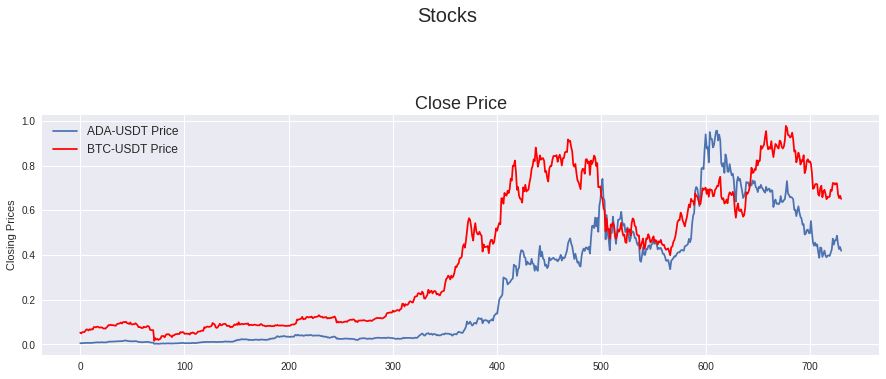

In [8]:
fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Stocks", fontsize=20)
#st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(311)
ax1.plot(np.arange(stock_data.shape[0]), df['Close'], label='ADA-USDT Price')
ax1.plot(np.arange(stock_data.shape[0]), df_ref['Close'], label='BTC-USDT Price', color ='red')
ax1.set_ylabel('Closing Prices')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)


In [9]:
'''Calculate percentage change'''
df['Open'] = df['Open'].pct_change() # Create arithmetic returns column
df['High'] = df['High'].pct_change() # Create arithmetic returns column
df['Low'] = df['Low'].pct_change() # Create arithmetic returns column
df['Close'] = df['Close'].pct_change() # Create arithmetic returns column
df['Volume'] = df['Volume'].pct_change()

df.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################

df_ref['Open'] = df_ref['Open'].pct_change() # Create arithmetic returns column
df_ref['High'] = df_ref['High'].pct_change() # Create arithmetic returns column
df_ref['Low'] = df_ref['Low'].pct_change() # Create arithmetic returns column
df_ref['Close'] = df_ref['Close'].pct_change() # Create arithmetic returns column
df_ref['Volume'] = df_ref['Volume'].pct_change()

df_ref.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values



In [10]:
# Min-max normalize volume columns (0-1 range)
#df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)
#print(df_train.head())
###############################################################################

'''Create training, validation and test split'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

print(df_train.head())
# Remove date column
df_train.drop(columns=['OpenTime','CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'], inplace=True)
df_val.drop(columns=['OpenTime','CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'], inplace=True)
df_test.drop(columns=['OpenTime','CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

print(df_train.head())

        OpenTime      Open      High  ...        TBAV          TBQV  NA
1  1577923200000  0.039474 -0.019814  ...  19344719.1  6.353559e+05   0
2  1578009600000 -0.048101  0.061908  ...  53816813.9  1.820772e+06   0
3  1578096000000  0.098404  0.002380  ...  26567804.8  9.061852e+05   0
4  1578182400000  0.011501  0.045697  ...  33390473.2  1.159713e+06   0
5  1578268800000  0.014961  0.118615  ...  67435160.1  2.425999e+06   0

[5 rows x 12 columns]
Training data shape: (584, 5)
Validation data shape: (73, 5)
Test data shape: (73, 5)
       Open      High       Low     Close    Volume
1  0.039474 -0.019814 -0.034551 -0.049905  0.435809
2 -0.048101  0.061908  0.012388  0.098404  1.395273
3  0.098404  0.002380  0.094494  0.010291 -0.458684
4  0.011501  0.045697  0.027329  0.015578  0.293299
5  0.014961  0.118615  0.012092  0.160472  0.833716


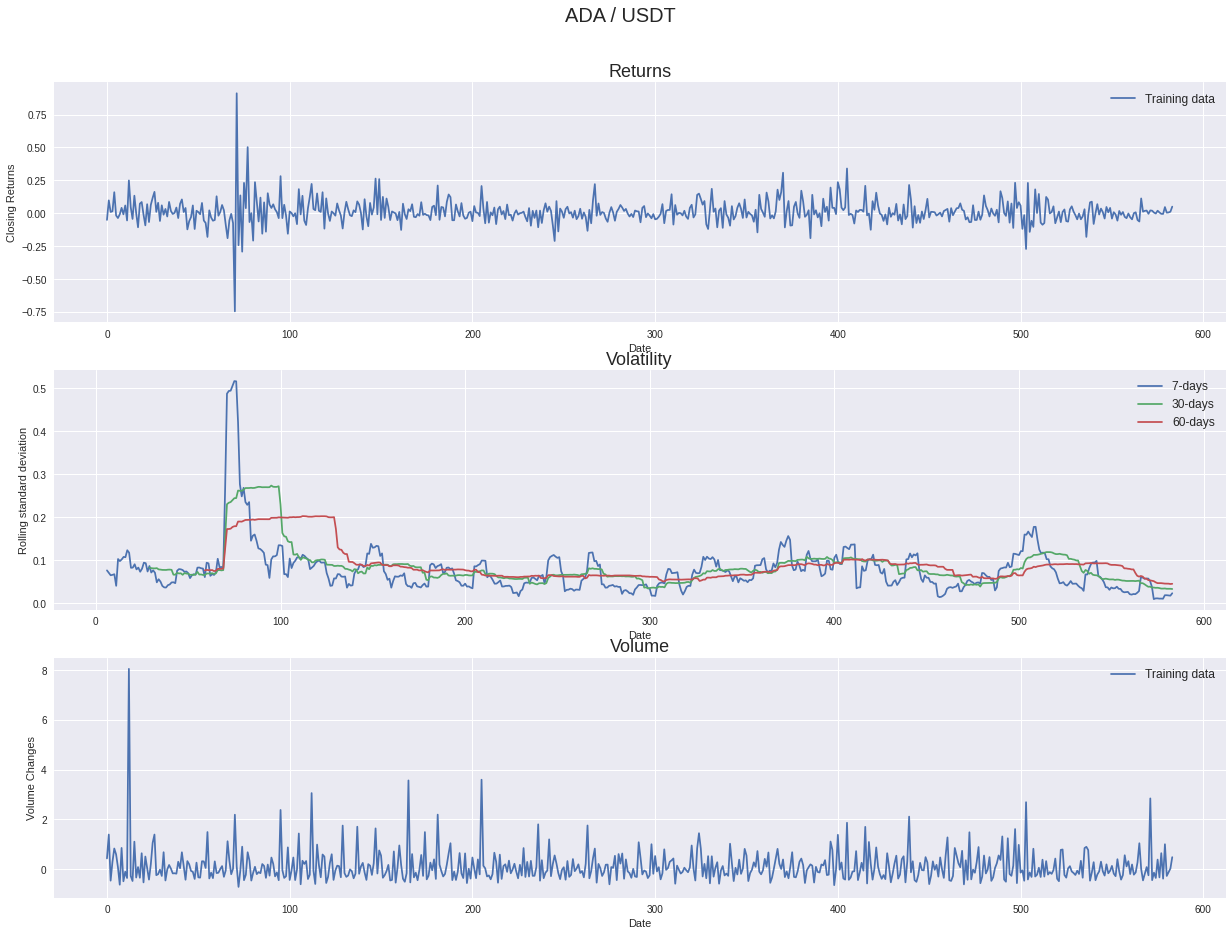

In [11]:
fig = plt.figure(figsize=(21,15))
st = fig.suptitle("ADA / USDT", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(311)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

#ax1.plot(np.arange(train_data.shape[0], train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')
#ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Returns')
ax1.set_title("Returns", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################
ax1 = fig.add_subplot(312)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'].rolling(7).std(), label='7-days ')
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'].rolling(30).std(), label='30-days')
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'].rolling(60).std(), label='60-days')

#ax1.plot(np.arange(train_data.shape[0], train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')
#ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling standard deviation')
ax1.set_title("Volatility", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(313)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

#ax2.plot(np.arange(train_data.shape[0], train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')
#ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')

ax2.set_xlabel('Date')
ax2.set_ylabel('Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)
plt.show()

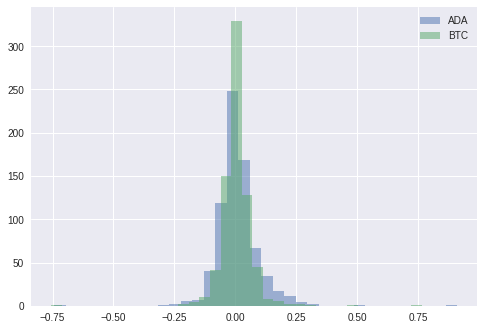

In [12]:
plt.hist(df['Close'], 35, alpha=0.5, label='ADA')
plt.hist(df_ref['Close'], 35, alpha=0.5, label='BTC')
plt.legend(loc='upper right')
plt.show()